<p>Visualize multiple annotations on a cropped section of the texture image.</p>

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import pandas as pd
from PIL import Image
import numpy as np

In [2]:
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../../skin3d')))
from skin3d.bodytex import BodyTexDataset
from skin3d.visualize import embed_annotatations

In [3]:
# Directory of the high-resolution meshes.
# You will have to change this based on where you saved the data.
# You don't need this to run this specific example.
dir_textures = '/mnt/d/data/3dbodytex-1.1-highres/3dbodytex-1.1-highres'

In [4]:
# Directory storing the example figure.
dir_figs = 'figs'

In [5]:
# File path of the bodytex CSV.
bodytex_csv = '../data/3dbodytex-1.1-highres/bodytex.csv'
bodytex_df = pd.read_csv(bodytex_csv, converters={'scan_id': lambda x: str(x)})
bodytex_df.head()

,subject_id,scan_name,scan_id,sex,pose,partition,selected
0,000-001,000-f-run,000,f,run,test,True
1,000-001,001-f-u,001,f,u,test,False
2,002-003,002-f-run,002,f,run,train,True
3,002-003,003-f-u,003,f,u,train,True
4,004-005,004-f-run,004,f,run,train,True


In [6]:
bodytex = BodyTexDataset(df=bodytex_df, dir_textures=dir_textures)

In [7]:
# If you already have the mesh texture images from here:
# https://cvi2.uni.lu/datasets/
# you can run the following code to load the entire texture image.
# Otherwise, you can skip this part and use the sample cropped image provided.
#full_img = np.asarray(bodytex.texture_image(scan_id), dtype=np.uint8).copy()
#crop_img = full_img[coords[0]:coords[1], coords[2]:coords[3], :]
#pil_crop = Image.fromarray(crop_img).convert('RGB')
#pil_crop

In [8]:
# Bounding boxes on a cropped image.
# This is only used for this example notebook. 
# In general, you should use the full texture images provided by 3DBodyTex.
crop_filepath = os.path.join(dir_figs, '290_crop.png')
# Crop coordinates.
coords = [325, 475, 900, 1400]
# Scan identifier.
scan_id = '290'

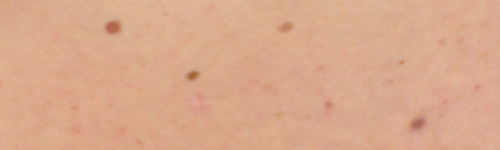

In [9]:
# Directory of figures for the example demo.
# Comment this block out if you already have the full texture images.
full_img = None
pil_crop = Image.open(crop_filepath).convert("RGB")
crop_img = np.asarray(pil_crop, dtype=np.uint8).copy()
pil_crop

In [10]:
# Blue = A1, Green=A2, Yellow=A3.
colors = np.asarray([[0,0,255], [0,255,0], [255,255,0],])
annotators = ["A1", "A2", "A3"]

# For visualization purposes, we pad the borders to make them easier to see. 
pad = 2
for annotator, color in zip(annotators, colors):
    ann_df = bodytex.annotation(scan_id, annotator)
    if full_img is None:
        # This is only needed if you don't have the full texture image
        # (as in the example we provide here)
        
        # Select bounding boxes with coordinates in the range of the crop.
        crop_df = ann_df[(ann_df.y > coords[0]) & (ann_df.y < coords[1]) & \
            (ann_df.x > coords[2]) & (ann_df.x < coords[3])].copy()
        # Offset the bounding boxes to be in the range of the crop.
        crop_df.x = crop_df.x - coords[2]
        crop_df.y = crop_df.y - coords[0]
        embed_annotatations(crop_img, crop_df, color, pad)
    else:
        # For the full texture image.
        embed_annotatations(full_img, ann_df, color, pad)


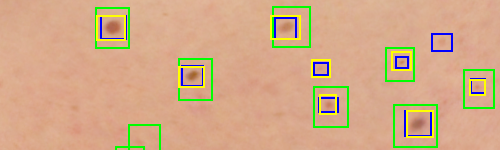

In [11]:
if full_img is None:
    # For this demo
    ann_img = Image.fromarray(crop_img).convert('RGB')
else:
    # If you have the full texture image.
    ann_img = Image.fromarray(full_img[coords[0]:coords[1], coords[2]:coords[3], :]).convert('RGB')
    
ann_img